# Group 9 - HR Employee Attrition

In [1]:
#!/usr/bin/env python
# coding: utf-8

# ## Business Case:-Based on given features we need to find whether an employee will leave the company or not.

# !pip install hvplot



In [2]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')


In [3]:
# In[2]:


## Loading the data
data=pd.read_csv('HR-Employee-Attrition.csv')
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# # EDA

# In[58]:


data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# In[63]:


data.tail()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [13]:
!pip install sweetviz

In [17]:
# # Univariant Analysis

# In[4]:


import sweetviz as sv #importing sweetviz library 
my_report = sv.analyze(data) #syntax to use sweetviz
my_report.show_html()
#Default arguments will generate to "SWEETVIZ_REPORT.html"


                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
# In[3]:


## Create a new dataframe with categorical variables only(Check the datatype by using info function)
data1=data[['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']]

In [19]:
# In[4]:


continous_col = []#list for continous columns
for column in data.columns:#acessing columns from datasets
    if data[column].dtype == int and len(data[column].unique()) >= 10: #checking whether it's datatype is int and count of unique label greater than 10  
        continous_col.append(column) # inserting those columns in list                                      
continous_col


[]

In [20]:
# In[5]:


## discrete data
discrete_col = []#list for continous columns
for column in data.columns:#acessing columns from datasets
    if data[column].dtype == int and len(data[column].unique()) < 10: #checking whether it's datatype is int and count of unique label greater than 10  
        discrete_col.append(column)
discrete_col

[]

In [21]:
# In[6]:


# columns with discrete values
data3=data[['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']]

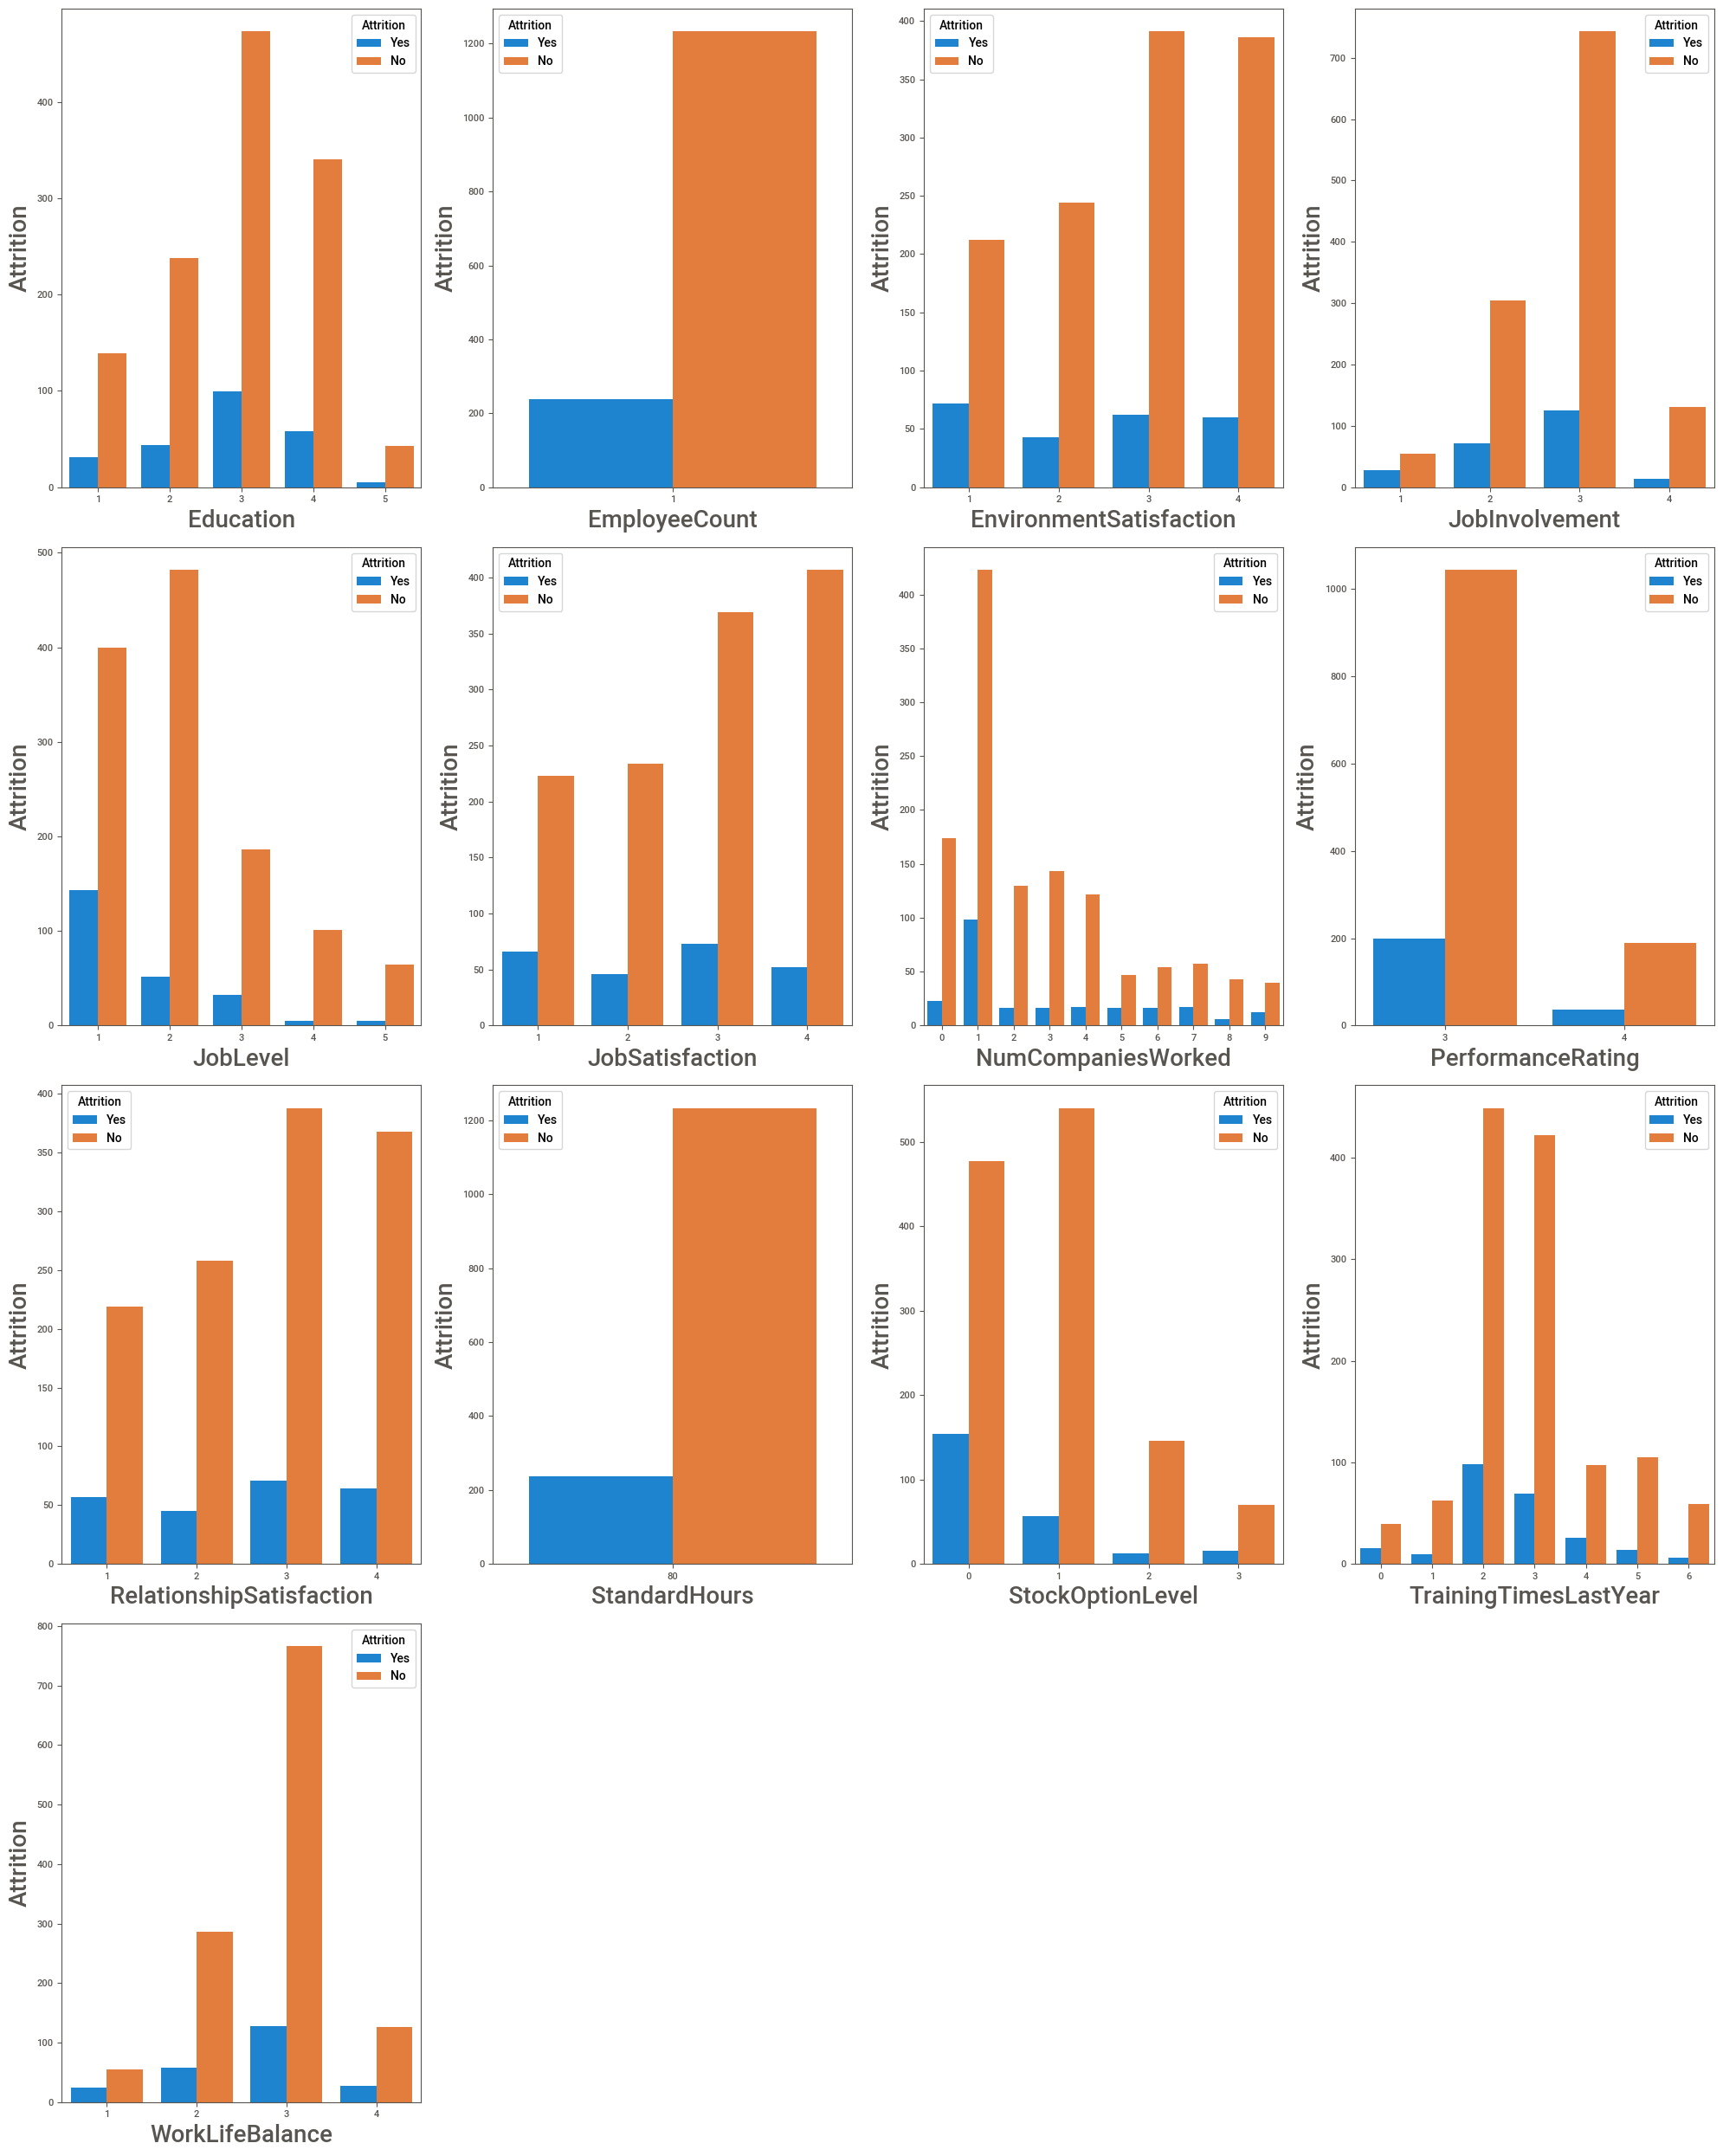

In [22]:
# In[10]:


# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1

for column in data3:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data3[column].dropna(axis=0) ,hue=data.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [23]:
# ### Bivariant analysis of continuous variables

# In[7]:


# columns with continuous variables/columns
data2=data[['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]


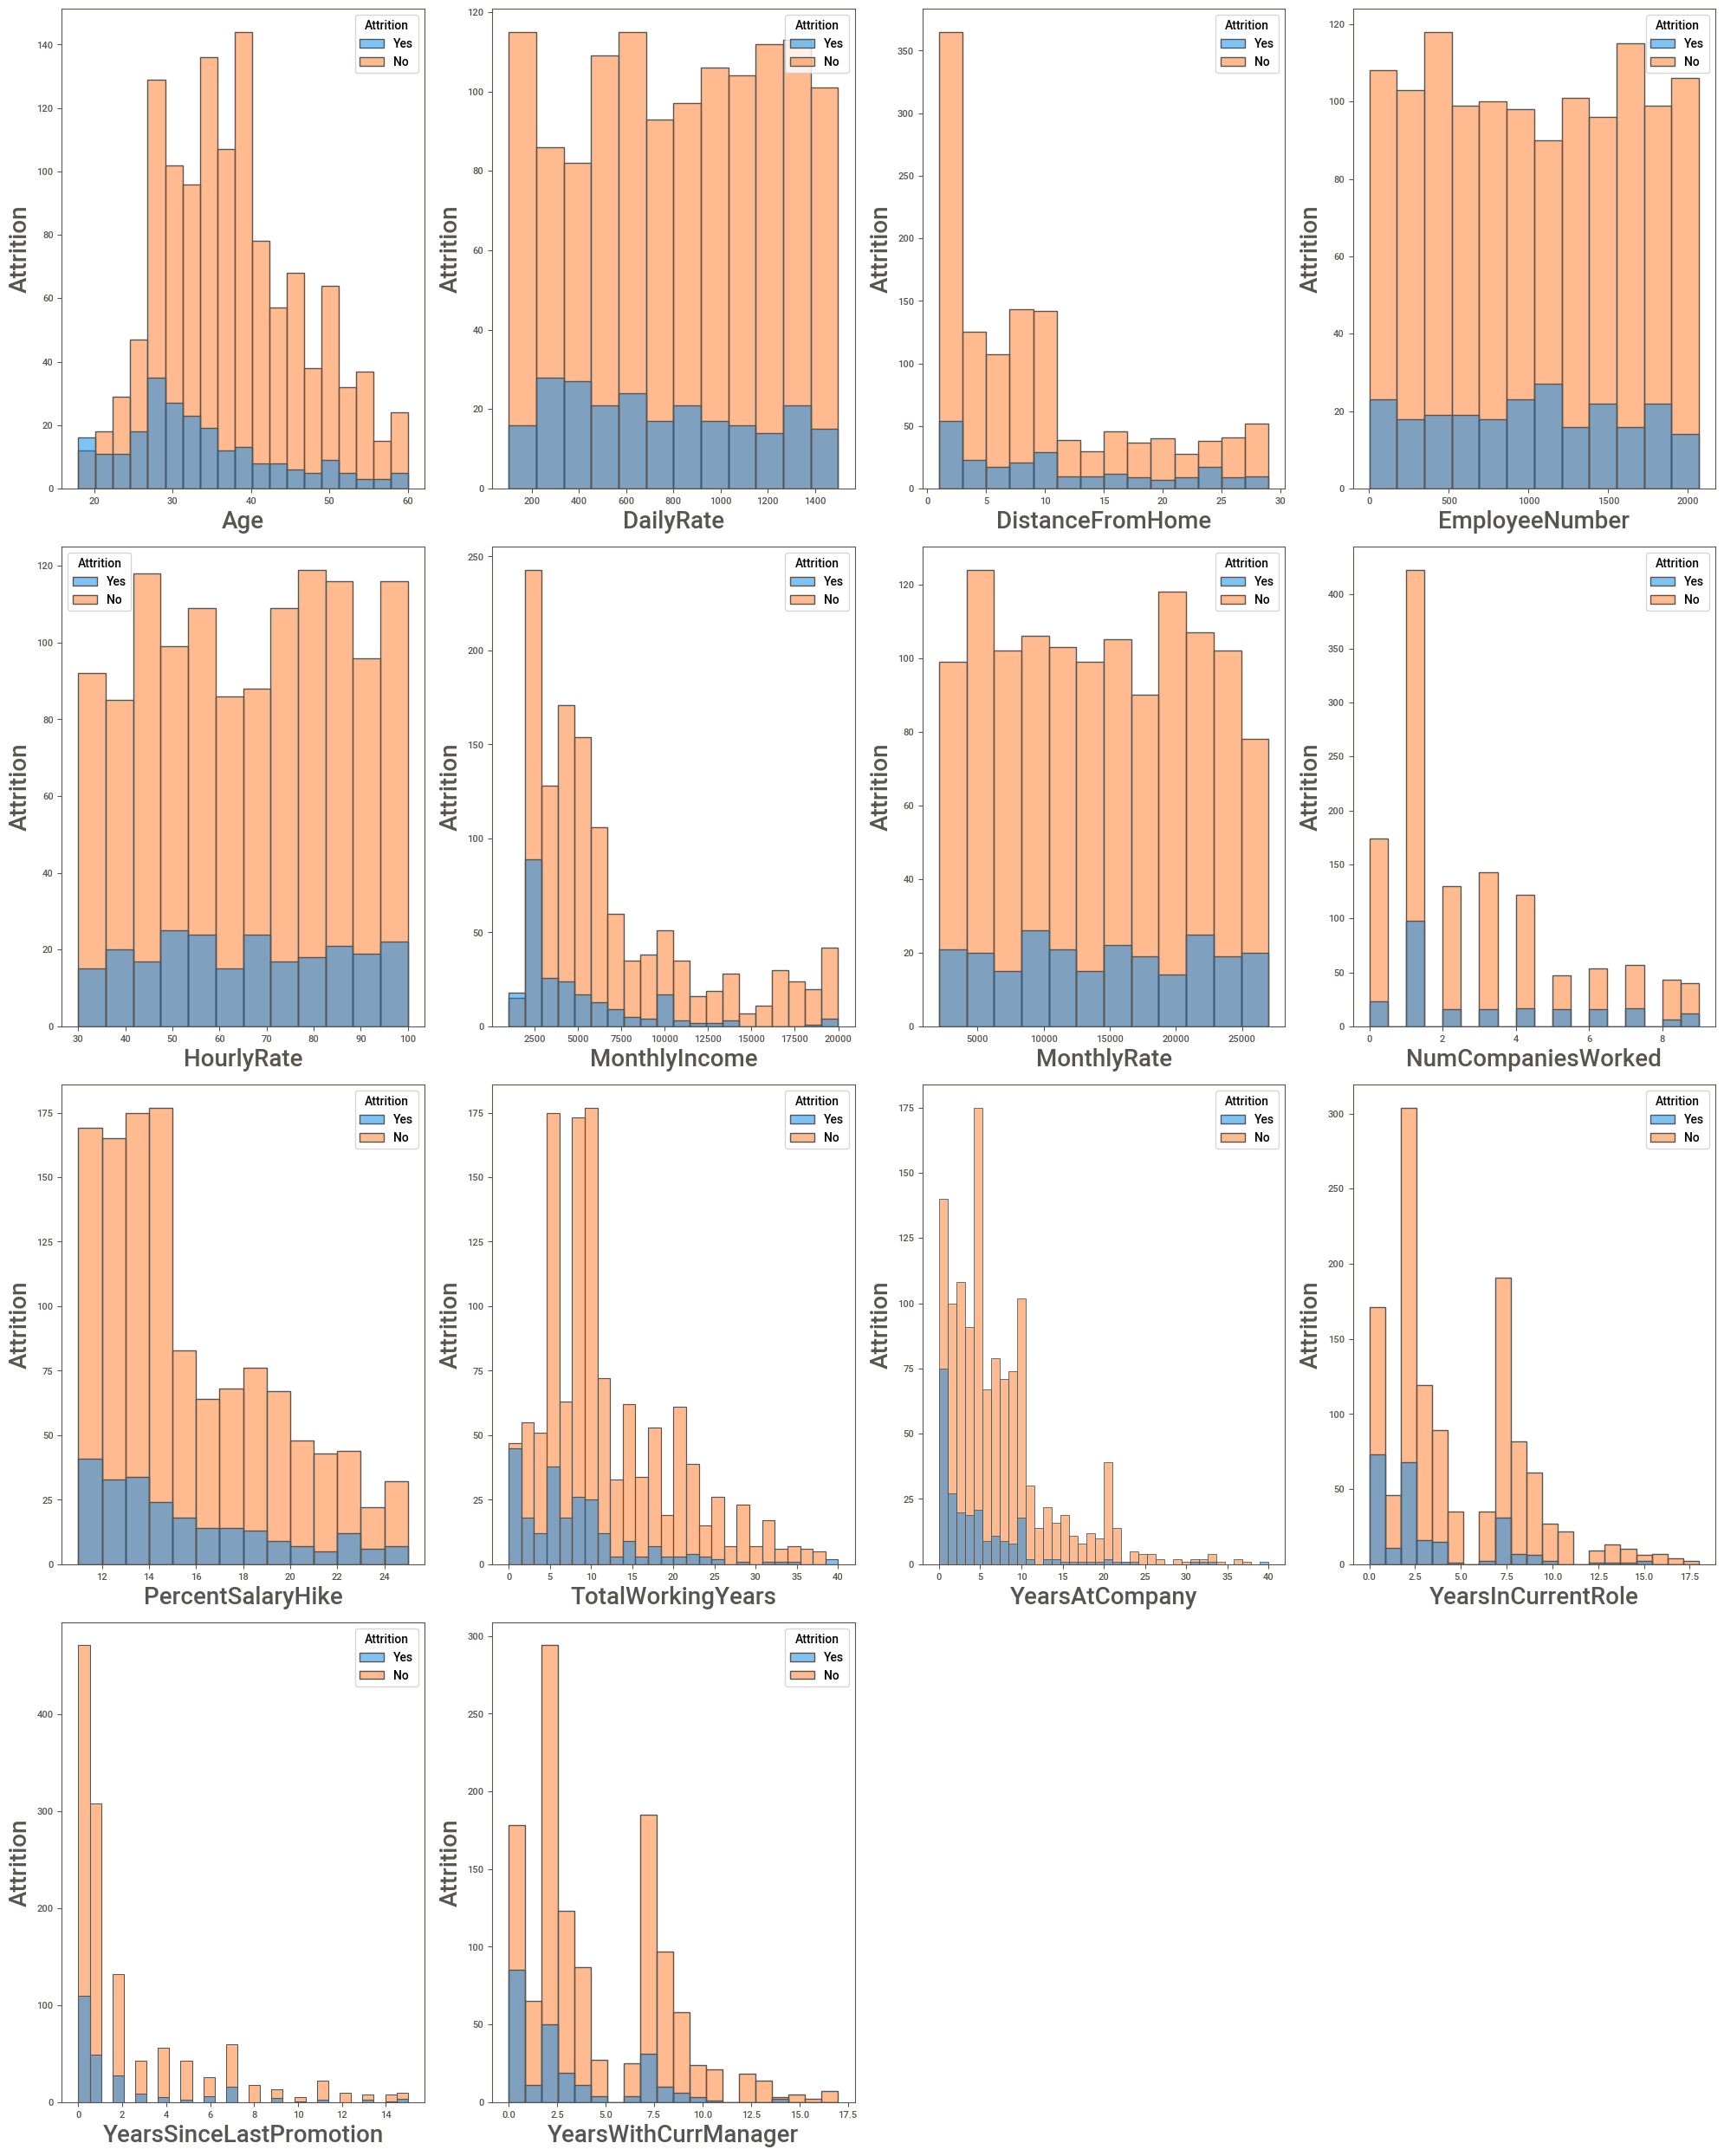

In [24]:
# In[12]:


# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1#counter for number of plot

for column in data2:#acessing columns form data2 DataFrame
    if plotnumber<=16 :#checking whether counter is less than 16 or not
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=data2[column].dropna(axis=0)# plotting hist plot and dropping null values,classification according to target
                        ,hue=data.Attrition)
        plt.xlabel(column,fontsize=20)##assigning name to x-axis and increasing it's font 
        plt.ylabel('Attrition',fontsize=20)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter by 1
plt.tight_layout()



<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

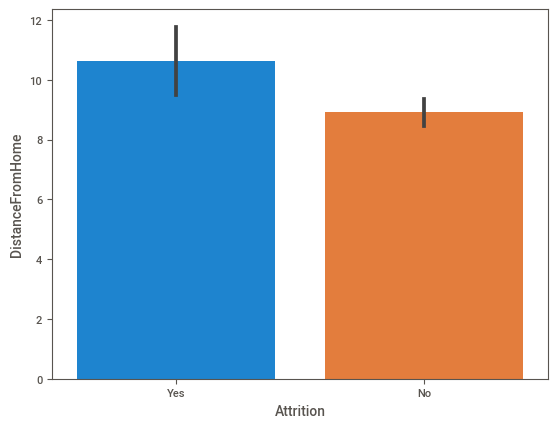

In [25]:
# In[14]:


sns.barplot(x='Attrition', y='DistanceFromHome', data=data)

<Axes: xlabel='Attrition', ylabel='Age'>

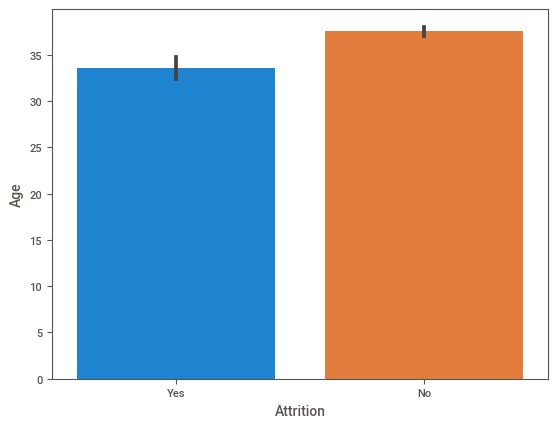

In [26]:
# In[15]:


sns.barplot(x='Attrition', y='Age', data=data)


<Axes: xlabel='Attrition', ylabel='NumCompaniesWorked'>

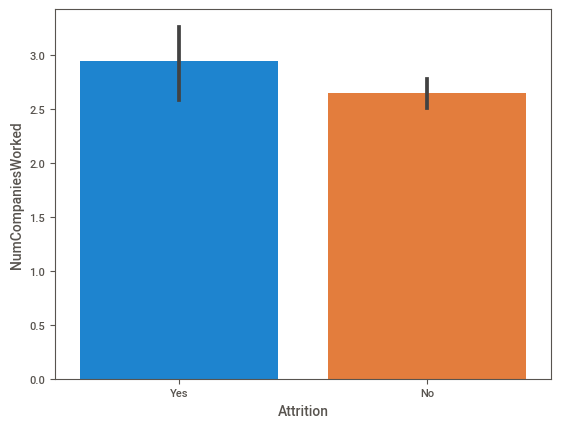

In [27]:
# In[17]:


sns.barplot(x='Attrition', y='NumCompaniesWorked', data=data)


<Axes: xlabel='Attrition', ylabel='Age'>

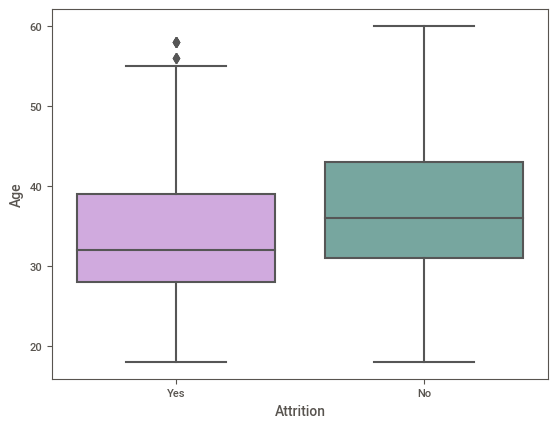

In [28]:
# In[30]:


sns.boxplot(x="Attrition",y="Age",data=data,palette=["#D4A1E7","#6faea4"])

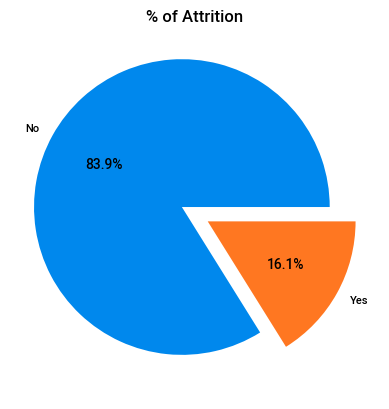

In [29]:
# In[35]:


pie = data.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title("% of Attrition")
plt.show()
# 84% of the employees in the dataset have not left the company.

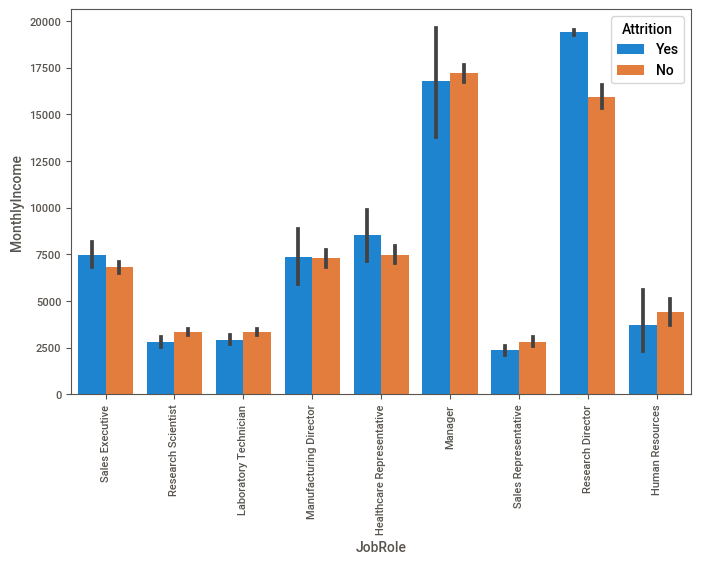

In [30]:
# In[41]:


plt.figure(figsize=(8,5))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=data)
plt.xticks(rotation=90)
plt.show()

In [32]:
# ## Insights
# 
# BusinessTravel : The workers who travel alot are more likely to quit then other employees.
# 
# Department : The worker in Research & Development are more likely to stay then the workers on other departement.
# 
# EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.
# 
# Gender : The Male are more likely to quit.
# 
# JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.
# 
# MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.
# 
# OverTime : Attrition rate is almost equal

# In[8]:

data.isnull().sum()#null value checking 
# no null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

C:\Users\Admin\AppData\Local\Temp\ipykernel_5400\498464855.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=False)


<Axes: >

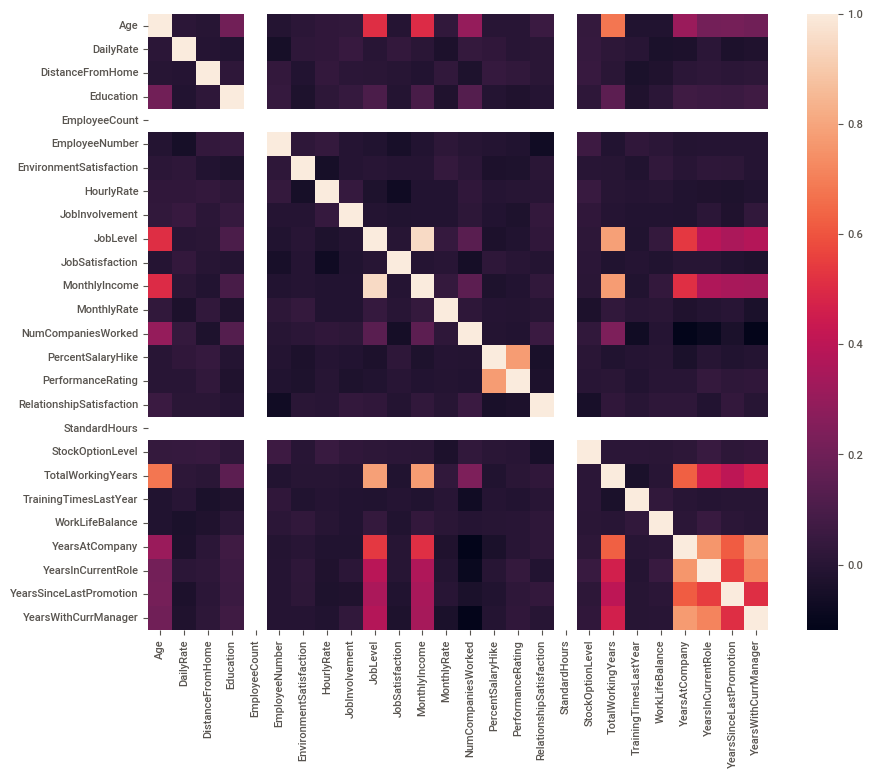

In [33]:
# In[9]:


plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=False)


# # Data Preprocessing

# ###  1.Attrition

In [34]:
# In[10]:


# Conversion of  Categorical variables
## Manual encoding Attrition feature
data.Attrition=data.Attrition.map({'Yes':1,'No':0})
data.head()###  1.Attrition


# ###  2.BusinessTravel 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [35]:
# In[11]:


data.BusinessTravel=data.BusinessTravel.map({'Travel_Frequently':2,
                                             'Travel_Rarely':1,
                                             'Non-Travel':0})


# ### 3.Department


In [36]:
# In[12]:


data.Department=data.Department.map({'Research & Development':2,
                                     'Sales':1,
                                     'Human Resources':0})#imputation using map function
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [37]:
# ### 4.EducationField

# In[13]:


#using map function
data.EducationField=data.EducationField.map({'Life Sciences':5,
                                             'Medical':4,
                                             'Marketing':3,
                                             'Technical Degree':2,
                                             'Other':1,
                                             'Human Resources':0 })


In [38]:
# ### 5.Gender

# In[14]:


#checking weightage of each label whoever have high count 
data.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [39]:
# In[15]:


## Encoding Gender by one hot encoding.
data.Gender=pd.get_dummies(data.Gender,drop_first=True)

In [40]:
# In[16]:


data.Gender


# ### 6. JobRole

0       0
1       1
2       1
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Gender, Length: 1470, dtype: uint8

In [41]:
# In[17]:


## Encoding JobRole
data.JobRole=data.JobRole.map({'Laboratory Technician':8,
                               'Sales Executive':7,
                               'Research Scientist':6,
                               'Sales Representative':5,
                               'Human Resources':4,
                               'Manufacturing Director':3,
                               'Healthcare Representative':2,
                               'Manager':1,
                               'Research Director':0 })



In [42]:
# ### 7. Encoding MaritalStatus using label encoding 
# 

# In[18]:


## Encoding MaritalStatus

from sklearn.preprocessing import LabelEncoder
#importing label encoder from sklearn 

label = LabelEncoder()#object creation 

data.MaritalStatus=label.fit_transform(data.MaritalStatus)
#applying label encoder to  marital status

data.MaritalStatus


0       2
1       1
2       2
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: MaritalStatus, Length: 1470, dtype: int32

In [43]:
# ### 8. OverTime

# In[19]:


## Encoding OverTime
data.OverTime=label.fit_transform(data.OverTime)#label encoding

data.OverTime

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int32

In [44]:
# ### `Employee attrition is a major concern for companies, but by using data analysis, companies can gain valuable insights into why employees leave and take proactive measures to improve retention. The IBM HR Dataset is a valuable resource for this, providing a wide range of variables that can help companies understand the root causes of attrition and improve employee engagement. By using this dataset, companies can reduce turnover rates, improve productivity, and create a positive work environment for their employees`

# ## Implementation of ML Algorithm

# In[37]:


# Dropping 'Over 18' column because values are constant
data.drop(['Over18'], inplace = True, axis = 1)


In [45]:
# In[39]:


## Creating independent and dependent variable
X = data.drop('Attrition', axis=1)#independent variable 
y = data.Attrition#dependent variable 

In [46]:
# In[40]:


## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42)


In [47]:
# In[41]:


#importing decision tree from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

#object creation for decision tree
dt=DecisionTreeClassifier()

#training the model  
dt.fit(X_train, y_train)

#prediction
y_predict=dt.predict(X_test)


In [48]:
# In[42]:


#predicting training data to check training performance.
y_train_predict=dt.predict(X_train)
y_train_predict


# ## Evaluation


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
# In[52]:


#importing mertics to check model performance
from sklearn.metrics import accuracy_score,f1_score, classification_report

##Training score
y_train_predict = dt.predict(X_test)

acc=accuracy_score(y_test,y_predict)
acc


0.7663043478260869

In [50]:
# In[53]:


f1=f1_score(y_test,y_predict)
f1

0.2711864406779661

In [51]:
# In[54]:


cm1=pd.crosstab(y_test,y_predict)
cm1

col_0,0,1
Attrition,,
0,266,54
1,32,16


In [52]:
# In[55]:


print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       320
           1       0.23      0.33      0.27        48

    accuracy                           0.77       368
   macro avg       0.56      0.58      0.57       368
weighted avg       0.81      0.77      0.78       368

